In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [15]:
df = pd.read_csv('../Dataset/ConsumptionIndustry.csv', sep=';')

df['HourDK'] = pd.to_datetime(df['HourDK'])
df['ConsumptionkWh'] = df['ConsumptionkWh'].str.replace(",", ".").astype(float)
df.index = df['HourDK']
df.drop(columns=['HourUTC', 'HourDK', 'MunicipalityNo', 'Branche'], inplace=True)

df2 = pd.read_csv('../Dataset/ELSpotPrices.csv', sep=';')
df2['HourDK'] = pd.to_datetime(df2['HourDK'])
df2['SpotPriceDKK'] = df2['SpotPriceDKK'].str.replace(",", ".").astype(float)
df2.index = df2['HourDK']
df2.drop(columns=['HourUTC', 'HourDK', 'PriceArea', 'SpotPriceEUR'], inplace=True)

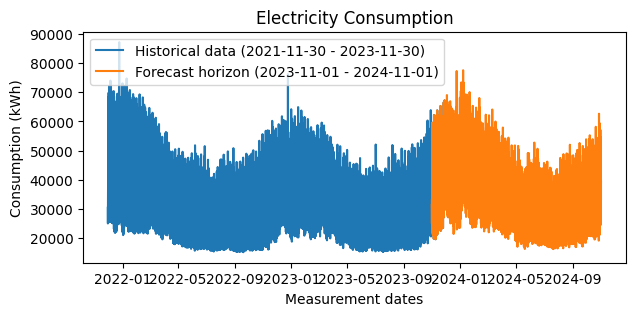

In [16]:
train_start = "2021-11-30"
train_end = "2023-11-30"
test_start = "2023-11-01"
test_end = "2024-11-01"

data_train = df[(df.index >= train_start) & (df.index <= train_end)]
data_test = df[(df.index >= test_start) & (df.index <= test_end)]

plt.figure(figsize=(7, 3))
plt.plot(data_train.index, data_train['ConsumptionkWh'], label=f'Historical data ({train_start} - {train_end})')
plt.plot(data_test.index, data_test['ConsumptionkWh'], label=f'Forecast horizon ({test_start} - {test_end})')
plt.title('Electricity Consumption')
plt.xlabel('Measurement dates')
plt.ylabel('Consumption (kWh)')
plt.legend()
plt.show()


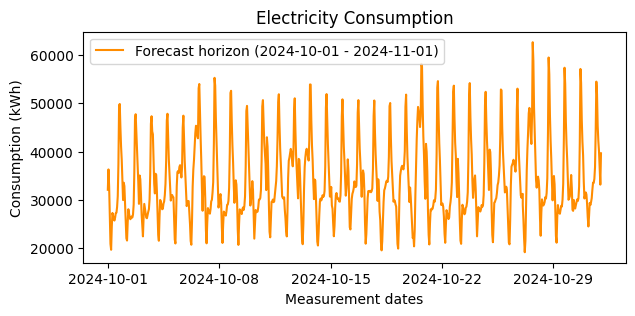

In [17]:
date_start = "2024-10-01"
date_end = "2024-11-01"
df_figure = df[(df.index >= date_start) & (df.index <= date_end)]

plt.figure(figsize=(7, 3))
plt.plot(df_figure.index, df_figure['ConsumptionkWh'], label=f'Forecast horizon ({date_start} - {date_end})', color='darkorange')
plt.title('Electricity Consumption')
plt.xlabel('Measurement dates')
plt.ylabel('Consumption (kWh)')
plt.legend()

plt.xticks(pd.date_range(start=date_start, end=date_end, freq='7D'), rotation=0)
plt.show()

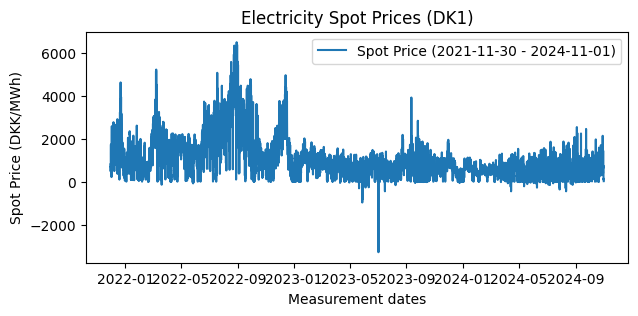

In [21]:
train_start = "2021-11-30"
train_end = "2024-11-01"

data_train = df2[(df2.index >= train_start) & (df2.index <= train_end)]
data_test = df2[(df2.index >= test_start) & (df2.index <= test_end)]

plt.figure(figsize=(7, 3))
plt.plot(data_train.index, data_train['SpotPriceDKK'], label=f'Spot Price ({train_start} - {train_end})')
plt.title('Electricity Spot Prices (DK1)')
plt.xlabel('Measurement dates')
plt.ylabel('Spot Price (DKK/MWh)')
plt.legend()
plt.show()


In [19]:
corr, _ = pearsonr(df['ConsumptionkWh'], df2['SpotPriceDKK'])
print(f'Pearsons correlation: {corr:.3f}')

# r=0 means no correlation, r=1 means perfect positive correlation, r=-1 means perfect negative correlation

Pearsons correlation: -0.006
